In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data=pd.read_csv(r"D:\USA_Housing (1).csv")

In [3]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,NaN,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,NaN,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,NaN,3.26,NaN,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,NaN,4.23,NaN,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,NaN,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,NaN,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,NaN,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,NaN,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4600 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               4819 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


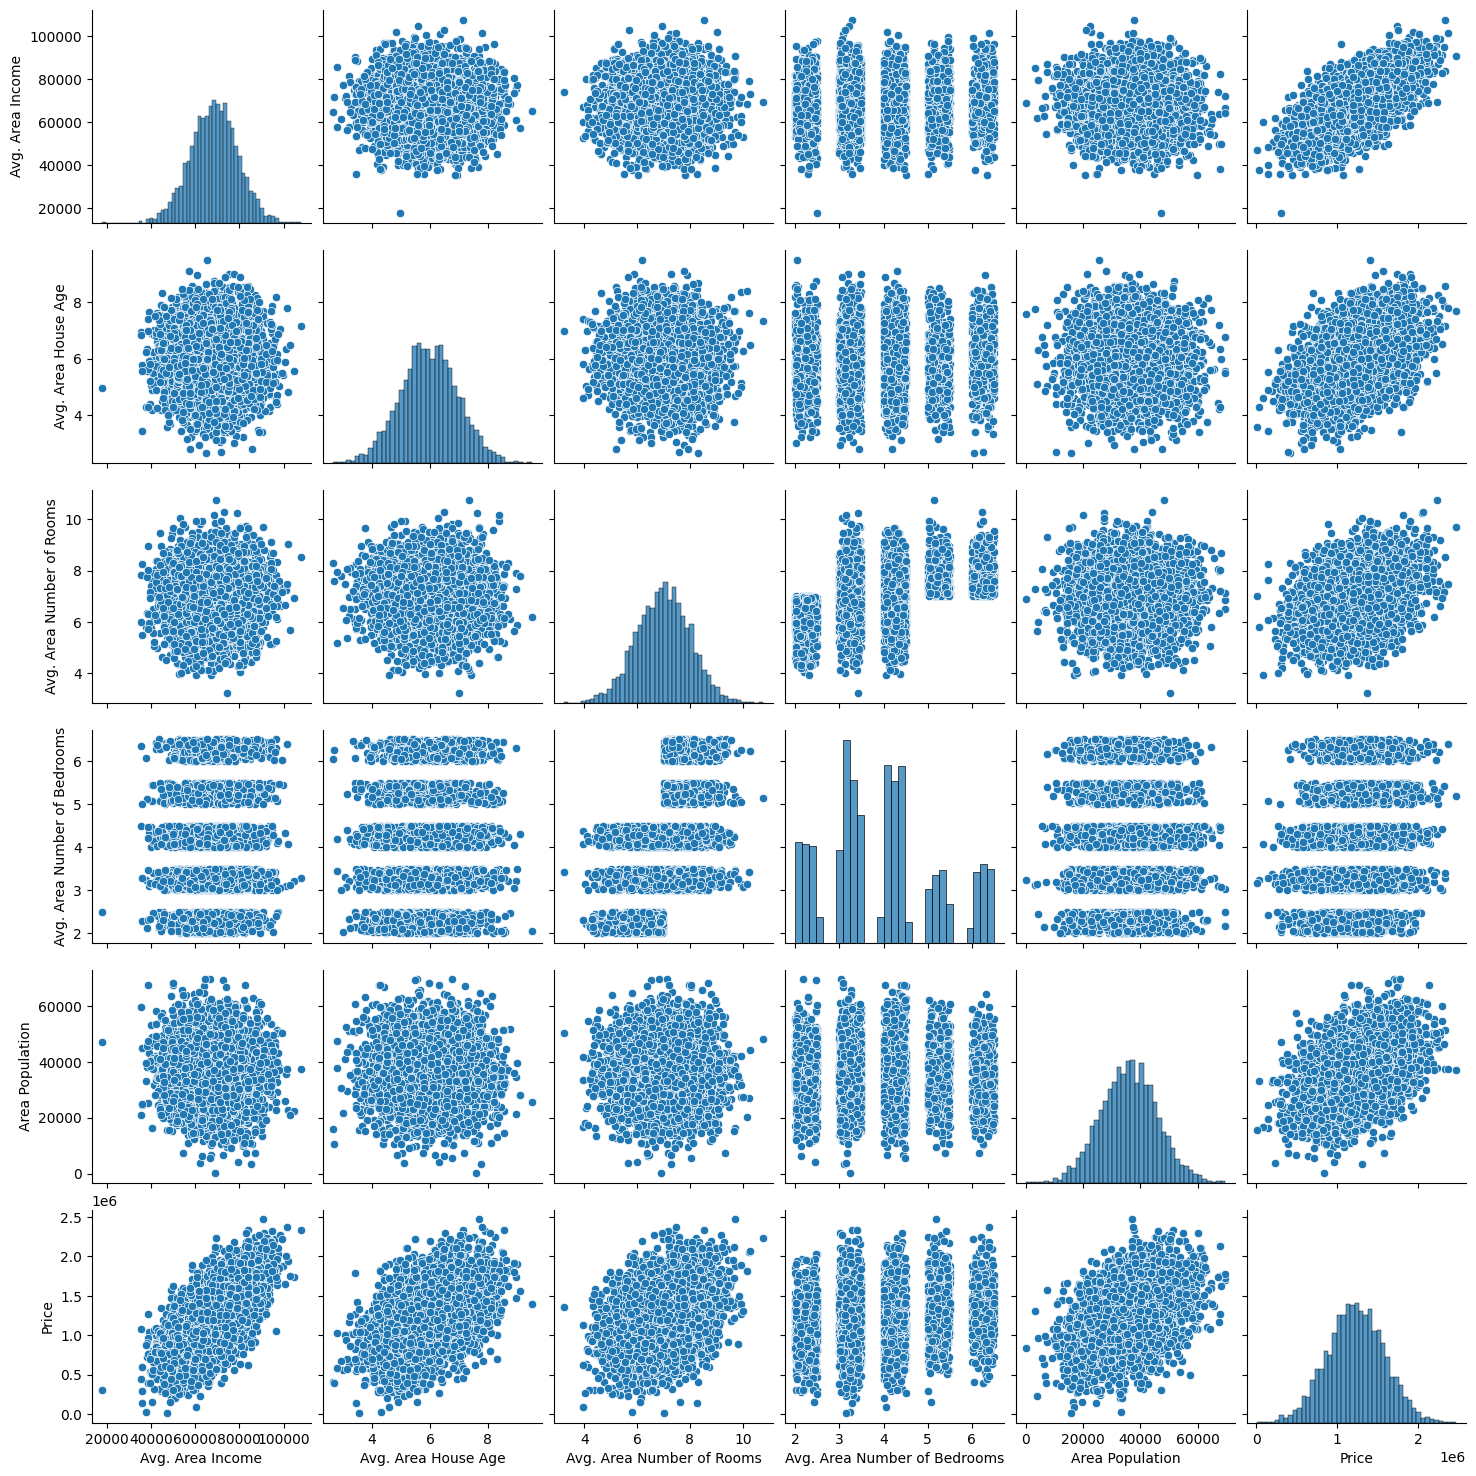

In [6]:
sns.pairplot(data)
plt.show()

In [7]:
data.corr(numeric_only=True)["Price"].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.333349
Area Population                 0.407357
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [8]:
data.drop("Address",axis=1,inplace=True)

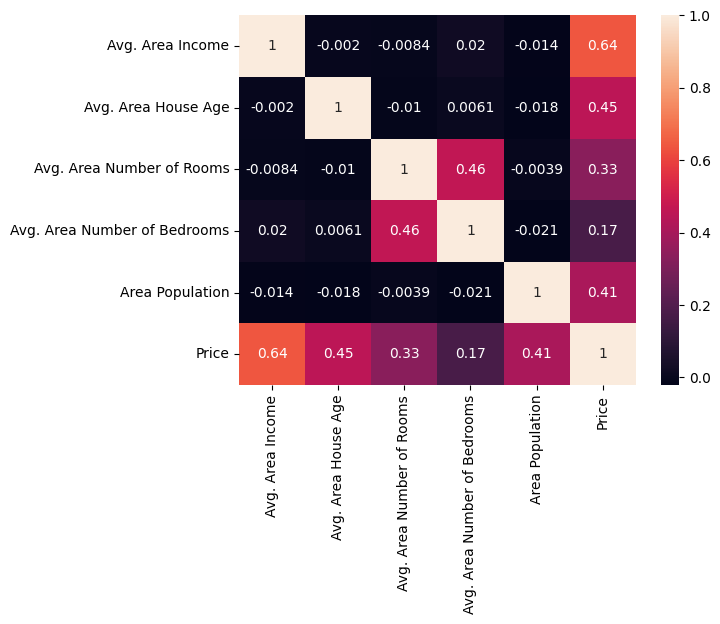

In [9]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
data.isnull().sum()

Avg. Area Income                  0
Avg. Area House Age               0
Avg. Area Number of Rooms       400
Avg. Area Number of Bedrooms      0
Area Population                 181
Price                             0
dtype: int64

In [11]:
data["Area Population"].fillna(np.mean(data["Area Population"]), inplace = True)
data["Avg. Area Number of Rooms"].fillna(np.mean(data["Avg. Area Number of Rooms"]), inplace = True)

C:\Users\Felop\AppData\Local\Temp\ipykernel_768\1965520281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Area Population"].fillna(np.mean(data["Area Population"]), inplace = True)
C:\Users\Felop\AppData\Local\Temp\ipykernel_768\1965520281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [12]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

<Axes: >

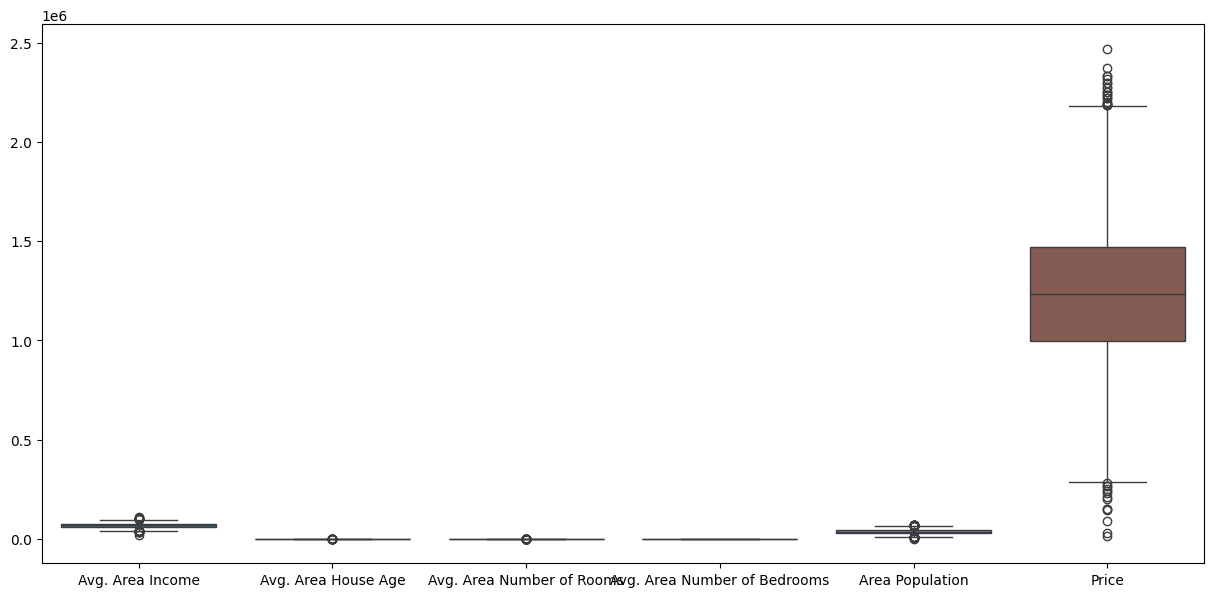

In [13]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data)

In [14]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers_mask = ((data['Price']< Q1 - threshold * IQR) | (data['Price']> Q3 + threshold * IQR))

data = data[~outliers_mask]

<Axes: >

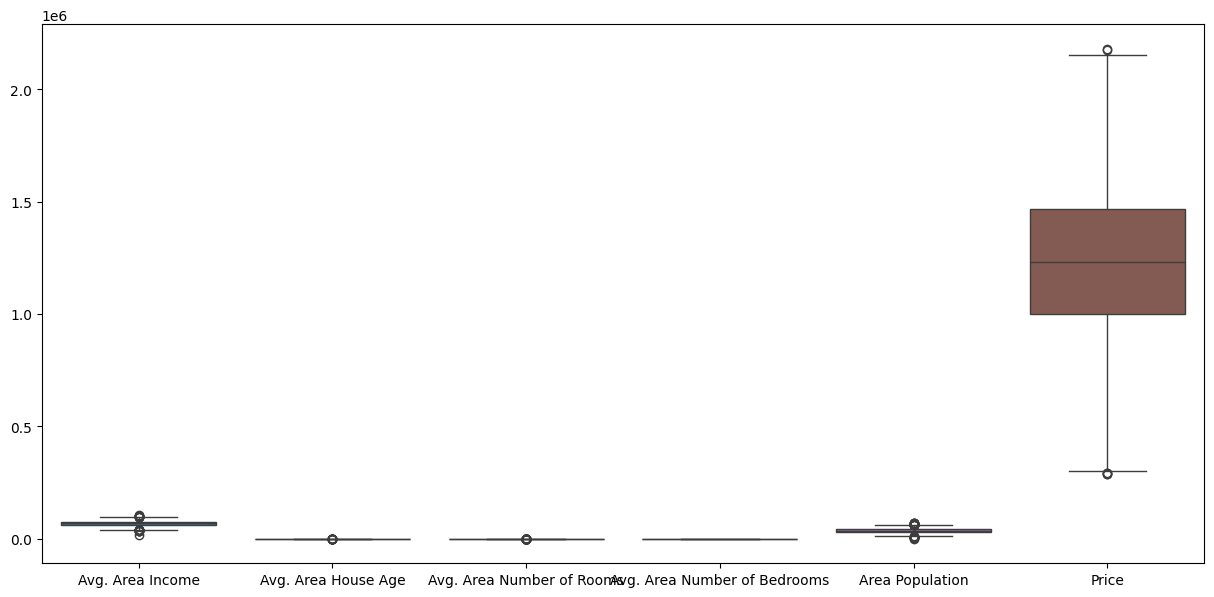

In [15]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data)

In [16]:
features=data.drop("Price",axis=1)
target=data["Price"]

In [17]:
from sklearn.model_selection import train_test_split 

Xtrain,Xtest,ytrain,ytest=train_test_split(features,target,test_size=.20,random_state=0)

In [18]:

from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']
minmax_scaler = MinMaxScaler()  

Xtrain[numerical_features] = minmax_scaler.fit_transform(Xtrain[numerical_features])

Xtest[numerical_features] = minmax_scaler.transform(Xtest[numerical_features])


In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [20]:
lr.fit(Xtrain,ytrain)

LinearRegression()

In [21]:
ypred=lr.predict(Xtest)

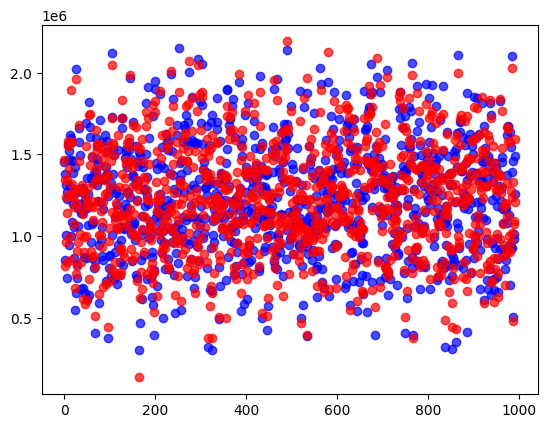

In [22]:
plt.scatter(range(len(ytest)), ytest, color='blue', label='ytest', alpha=0.7)
plt.scatter(range(len(ypred)), ypred, color='red', label='ypred', alpha=0.7)
plt.show()

In [26]:
Ytest_array=ytest.values
print(np.concatenate((ypred.reshape(len(ypred),1),Ytest_array.reshape(len(ytest),1)),1))

[[1466293.63945105 1450996.038     ]
 [ 813894.08073444  854812.258     ]
 [1344879.86019776 1379169.449     ]
 ...
 [1092479.32767601  981753.2384    ]
 [1204622.80926201 1257780.067     ]
 [1591633.44380977 1490539.058     ]]


In [45]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("Mean Abslutes error ",mean_absolute_error(ypred,ytest))
print("Mean squared error ",mean_squared_error(ypred,ytest))
print("Root Mean squared error ",np.sqrt(mean_squared_error(ypred,ytest)))
print("R2 Score",r2_score(ypred,ytest))

Mean Abslutes error  85466.37441336074
Mean squared error  12197320723.14612
Root Mean squared error  110441.48098946392
R2 Score 0.8914452603315198
